# Assign Other annotations

To assemble our annotations, we'll read our Other cell data and assign our expert annotations to those clusters. We'll then inspect the annotations in our UMAP projections, and output final labels for these cells

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

from datetime import date
import hisepy
import os
import pandas as pd
import scanpy as sc

### Helper function

This function makes it easy to pull csv files stored in HISE as a pandas data.frame

In [2]:
def read_csv_uuid(csv_uuid):
    csv_path = '/home/jupyter/cache/{u}'.format(u = csv_uuid)
    if not os.path.isdir(csv_path):
        hise_res = hisepy.reader.cache_files([csv_uuid])
    csv_filename = os.listdir(csv_path)[0]
    csv_file = '{p}/{f}'.format(p = csv_path, f = csv_filename)
    df = pd.read_csv(csv_file, index_col = 0)
    return df

## Read subclustering results from HISE

In [3]:
cell_class = 'other'

In [4]:
h5ad_uuid = '1eb6ca8c-b8ed-4968-b515-c954497441dc'
h5ad_path = '/home/jupyter/cache/{u}'.format(u = h5ad_uuid)

In [5]:
if not os.path.isdir(h5ad_path):
    hise_res = hisepy.reader.cache_files([h5ad_uuid])

In [6]:
h5ad_filename = os.listdir(h5ad_path)[0]
h5ad_file = '{p}/{f}'.format(p = h5ad_path, f = h5ad_filename)

In [7]:
adata = sc.read_h5ad(h5ad_file)

In [8]:
adata

AnnData object with n_obs × n_vars = 24603 × 4305
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'well_id', 'sample.sampleKitGuid', 'cohort.cohortGuid', 'subject.subjectGuid', 'subject.biologicalSex', 'subject.race', 'subject.ethnicity', 'subject.birthYear', 'sample.visitName', 'sample.drawDate', 'file.id', 'subject.cmv', 'subject.bmi', 'celltypist.low', 'seurat.l1', 'seurat.l1.score', 'seurat.l2', 'seurat.l2.score', 'seurat.l2.5', 'seurat.l2.5.score', 'seurat.l3', 'seurat.l3.score', 'predicted_doublet', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'leiden_resolution_1', 'leiden_resol

## Read annotations

In [9]:
anno_uuid = '03817547-e2e3-412b-b36e-538d2bc74c87'
anno = read_csv_uuid(anno_uuid)

downloading fileID: 03817547-e2e3-412b-b36e-538d2bc74c87
Files have been successfully downloaded!


In [10]:
anno.head()

,leiden_resolution_1,AIFI_L3,AIFI_L1,AIFI_L1_Final,AIFI_L2,AIFI_L2_Final,AIFI_L3_Final
0,0,Platelet,Platelet,Yes,Platelet,Yes,Yes
1,1,T+Erythocytes doublet,T+Erythocytes doublet,Yes,T+Erythocytes doublet,Yes,Yes
2,2,Platelet,Platelet,Yes,Platelet,Yes,Yes
3,3,T+Erythocytes doublet,T+Erythocytes doublet,Yes,T+Erythocytes doublet,Yes,Yes
4,4,Monocytes+Erythocytes doublet,Monocytes+Erythocytes doublet,Yes,Monocytes+Erythocytes doublet,Yes,Yes


In [11]:
join_col = 'leiden_resolution_1'

In [12]:
anno[join_col] = anno[join_col].astype('string').astype('category')

In [13]:
obs = adata.obs

In [14]:
sum(obs[join_col].isin(anno[join_col]))

24603

In [15]:
obs_anno = obs.merge(anno, how = 'left', on = join_col)

In [16]:
adata.obs = obs_anno
adata.obs = adata.obs.set_index('barcodes', drop = False)

In [17]:
adata.obs.head()

,barcodes,batch_id,cell_name,cell_uuid,chip_id,hto_barcode,hto_category,n_genes,n_mito_umis,n_reads,...,leiden,leiden_resolution_1,leiden_resolution_1.5,leiden_resolution_2,AIFI_L3,AIFI_L1,AIFI_L1_Final,AIFI_L2,AIFI_L2_Final,AIFI_L3_Final
barcodes,,,,,,,,,,,,,,,,,,,,,
cf7341b848b611ea8957bafe6d70929e,cf7341b848b611ea8957bafe6d70929e,B001,chalky_guileless_waterdogs,cf7341b848b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1482,176,17043,...,22,3,2,13,T+Erythocytes doublet,T+Erythocytes doublet,Yes,T+Erythocytes doublet,Yes,Yes
cf7400bc48b611ea8957bafe6d70929e,cf7400bc48b611ea8957bafe6d70929e,B001,illadvised_cogitative_bluejay,cf7400bc48b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1089,62,12523,...,22,4,12,14,Monocytes+Erythocytes doublet,Monocytes+Erythocytes doublet,Yes,Monocytes+Erythocytes doublet,Yes,Yes
cf763b8448b611ea8957bafe6d70929e,cf763b8448b611ea8957bafe6d70929e,B001,tricksome_sombrous_cats,cf763b8448b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1146,89,11185,...,21,1,1,1,T+Erythocytes doublet,T+Erythocytes doublet,Yes,T+Erythocytes doublet,Yes,Yes
cf76501a48b611ea8957bafe6d70929e,cf76501a48b611ea8957bafe6d70929e,B001,pensive_queasy_tadpole,cf76501a48b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1994,108,22387,...,29,9,11,8,CMP cell,Progenitor cell,Yes,Progenitor cell,Yes,Yes
cf83c0ba48b611ea8957bafe6d70929e,cf83c0ba48b611ea8957bafe6d70929e,B001,sodalite_foreign_puffin,cf83c0ba48b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,841,44,7236,...,21,1,1,19,T+Erythocytes doublet,T+Erythocytes doublet,Yes,T+Erythocytes doublet,Yes,Yes


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


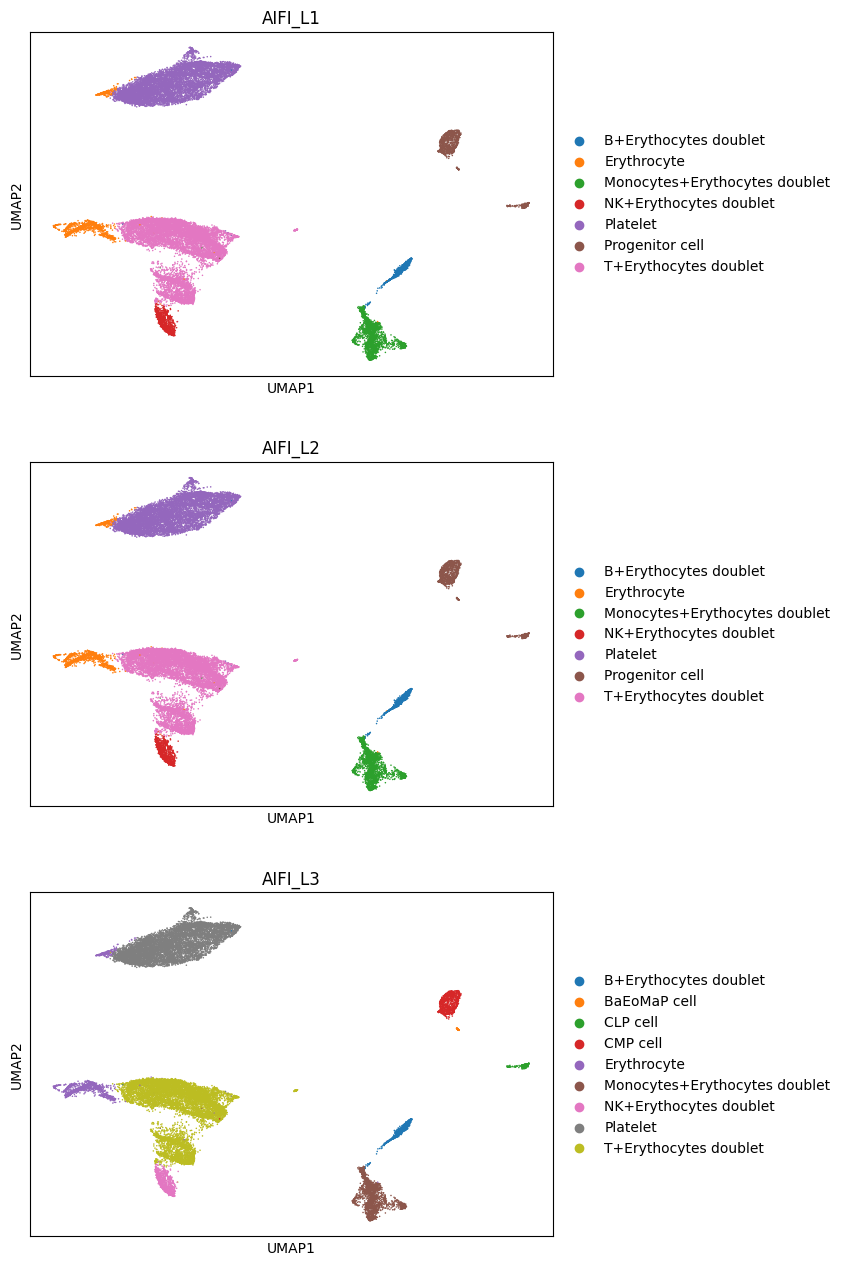

In [18]:
sc.pl.umap(adata, color = ['AIFI_L1', 'AIFI_L2', 'AIFI_L3'], ncols = 1)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


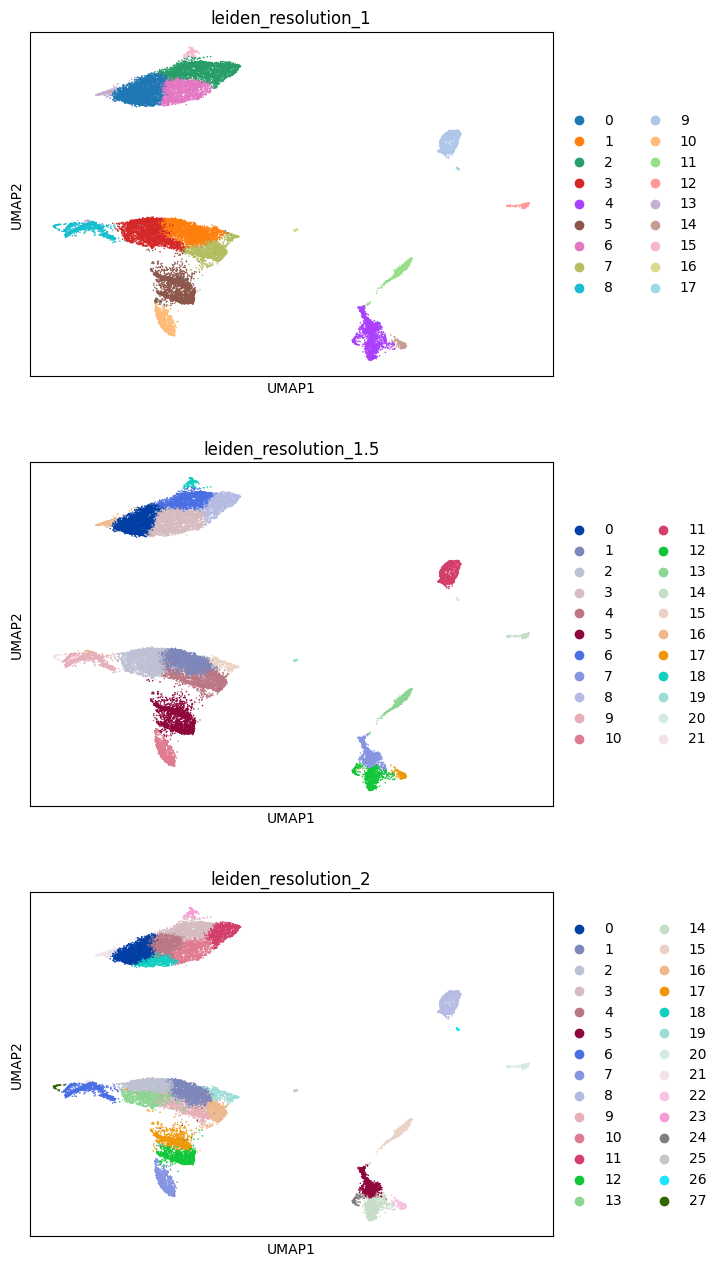

In [19]:
sc.pl.umap(adata, 
           color = ['leiden_resolution_1',
                    'leiden_resolution_1.5',
                    'leiden_resolution_2'],
           ncols = 1)

## Output final annotations

In [20]:
obs = adata.obs
obs = obs.reset_index(drop = True)

In [21]:
umap_mat = adata.obsm['X_umap']
umap_df = pd.DataFrame(umap_mat, columns = ['umap_1', 'umap_2'])
obs['umap_1'] = umap_df['umap_1']
obs['umap_2'] = umap_df['umap_2']

In [22]:
obs.head()

,barcodes,batch_id,cell_name,cell_uuid,chip_id,hto_barcode,hto_category,n_genes,n_mito_umis,n_reads,...,leiden_resolution_1.5,leiden_resolution_2,AIFI_L3,AIFI_L1,AIFI_L1_Final,AIFI_L2,AIFI_L2_Final,AIFI_L3_Final,umap_1,umap_2
0,cf7341b848b611ea8957bafe6d70929e,B001,chalky_guileless_waterdogs,cf7341b848b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1482,176,17043,...,2,13,T+Erythocytes doublet,T+Erythocytes doublet,Yes,T+Erythocytes doublet,Yes,Yes,-2.371720,1.574610
1,cf7400bc48b611ea8957bafe6d70929e,B001,illadvised_cogitative_bluejay,cf7400bc48b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1089,62,12523,...,12,14,Monocytes+Erythocytes doublet,Monocytes+Erythocytes doublet,Yes,Monocytes+Erythocytes doublet,Yes,Yes,7.942333,-5.333513
2,cf763b8448b611ea8957bafe6d70929e,B001,tricksome_sombrous_cats,cf763b8448b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1146,89,11185,...,1,1,T+Erythocytes doublet,T+Erythocytes doublet,Yes,T+Erythocytes doublet,Yes,Yes,-0.506895,2.742198
3,cf76501a48b611ea8957bafe6d70929e,B001,pensive_queasy_tadpole,cf76501a48b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1994,108,22387,...,11,8,CMP cell,Progenitor cell,Yes,Progenitor cell,Yes,Yes,12.154108,9.127453
4,cf83c0ba48b611ea8957bafe6d70929e,B001,sodalite_foreign_puffin,cf83c0ba48b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,841,44,7236,...,1,19,T+Erythocytes doublet,T+Erythocytes doublet,Yes,T+Erythocytes doublet,Yes,Yes,-0.071208,2.975142


In [23]:
out_dir = 'output'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

In [24]:
obs_out_csv = '{p}/ref_pbmc_{c}_labeled_meta_umap_{d}.csv'.format(p = out_dir, c = cell_class, d = date.today())
obs.to_csv(obs_out_csv, index = False)

In [25]:
obs_out_parquet = '{p}/ref_pbmc_{c}_labeled_meta_umap_{d}.parquet'.format(p = out_dir, c = cell_class, d = date.today())
obs.to_parquet(obs_out_parquet, index = False)

In [26]:
bc_anno = obs[['barcodes', 'AIFI_L1', 'AIFI_L2', 'AIFI_L3']]

In [27]:
label_out_csv = '{p}/ref_pbmc_{c}_barcode_labels_{d}.csv'.format(p = out_dir, c = cell_class, d = date.today())
bc_anno.to_csv(label_out_csv, index = False)

In [28]:
label_out_parquet = '{p}/ref_pbmc_{c}_barcode_labels_{d}.parquet'.format(p = out_dir, c = cell_class, d = date.today())
bc_anno.to_parquet(label_out_parquet, index = False)

## Upload annotations to HISE

Finally, we'll use `hisepy.upload.upload_files()` to send a copy of our output to HISE to use for downstream analysis steps.

In [29]:
study_space_uuid = '64097865-486d-43b3-8f94-74994e0a72e0'
title = 'Other barcode annotations {d}'.format(d = date.today())

In [30]:
in_files = [h5ad_uuid, anno_uuid]

In [31]:
in_files

['1eb6ca8c-b8ed-4968-b515-c954497441dc',
 '03817547-e2e3-412b-b36e-538d2bc74c87']

In [32]:
out_files = [obs_out_csv, obs_out_parquet,
             label_out_csv, label_out_parquet]

In [33]:
out_files

['output/ref_pbmc_other_labeled_meta_umap_2024-03-01.csv',
 'output/ref_pbmc_other_labeled_meta_umap_2024-03-01.parquet',
 'output/ref_pbmc_other_barcode_labels_2024-03-01.csv',
 'output/ref_pbmc_other_barcode_labels_2024-03-01.parquet']

In [34]:
hisepy.upload.upload_files(
    files = out_files,
    study_space_id = study_space_uuid,
    title = title,
    input_file_ids = in_files
)

Cannot determine the current notebook.
1) /home/jupyter/scRNA-Reference-IH-A/05-Assembly/20-Python_assign_Other_cells.ipynb
2) /home/jupyter/scRNA-Reference-IH-A/05-Assembly/19-Python_assign_NK_cells.ipynb
3) /home/jupyter/scRNA-Reference-IH-A/05-Assembly/18-Python_assign_Myeloid_cells.ipynb
Please select (1-3) 


 1


you are trying to upload file_ids... ['output/ref_pbmc_other_labeled_meta_umap_2024-03-01.csv', 'output/ref_pbmc_other_labeled_meta_umap_2024-03-01.parquet', 'output/ref_pbmc_other_barcode_labels_2024-03-01.csv', 'output/ref_pbmc_other_barcode_labels_2024-03-01.parquet']. Do you truly want to proceed?


(y/n) y


{'trace_id': '9661fa36-3916-41ca-b413-5660c8461106',
 'files': ['output/ref_pbmc_other_labeled_meta_umap_2024-03-01.csv',
  'output/ref_pbmc_other_labeled_meta_umap_2024-03-01.parquet',
  'output/ref_pbmc_other_barcode_labels_2024-03-01.csv',
  'output/ref_pbmc_other_barcode_labels_2024-03-01.parquet']}

In [35]:
import session_info
session_info.show()